In [28]:
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import (txt_impotance_scores_convert_array,get_mask,squeeze_channel,linear_regression)

In [29]:
v = txt_impotance_scores_convert_array("base-CIFAR10-100epochs-256bs-each",0)

In [30]:
x = v[3]
y_method2 = v[4]

In [31]:
step = linear_regression(v)
#value = step_[4].copy()
hard = np.array(v[1])
soft = np.array(v[2])
#value = hard*0.4+soft
value = soft
for i in range(len(value)):
    value[i] -= step[i]

corrcoef 0.6038442470011256
coefficient of determination: 0.3646278746363565


In [32]:
# ----- プロット(散布図)作成 -----
def plot_scatter(x,y,squeeze_x=None,squeeze_y=None,title="method 1"):
    plt.rcParams["font.size"] = 20
    plt.rcParams["figure.figsize"] = (10, 10)
    fig    = plt.figure()
    fig.subplots_adjust(bottom=0.12)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("$x$", fontsize=20, fontname='serif')
    ax.set_ylabel("$y$", fontsize=20, fontname='serif')
    ax.tick_params(axis='both', length=10,  which='major')
    ax.tick_params(axis='both', length=5,  which='minor')
    ax.set_xlim(0.95, 1.03)
    ax.set_ylim(334.0, 362.8)
    ax.minorticks_on()
    ax.scatter(x, y, s=25, marker='o', edgecolor="b")
    ax.legend(title=title)
    if squeeze_x and squeeze_y:
        ax.scatter(squeeze_x, squeeze_y, s=25, marker='o', edgecolor="r")
    
    plt.show()

In [33]:
layer_0_mask = get_mask("pruned1_checkpoints/self-pruned-newest-CIFAR10-100epochs-256bs-each-0.5.pth",0)

squeeze_x = squeeze_channel(x,layer_0_mask)
squeeze_y = squeeze_channel(y_method2,layer_0_mask)

No handles with labels found to put in legend.


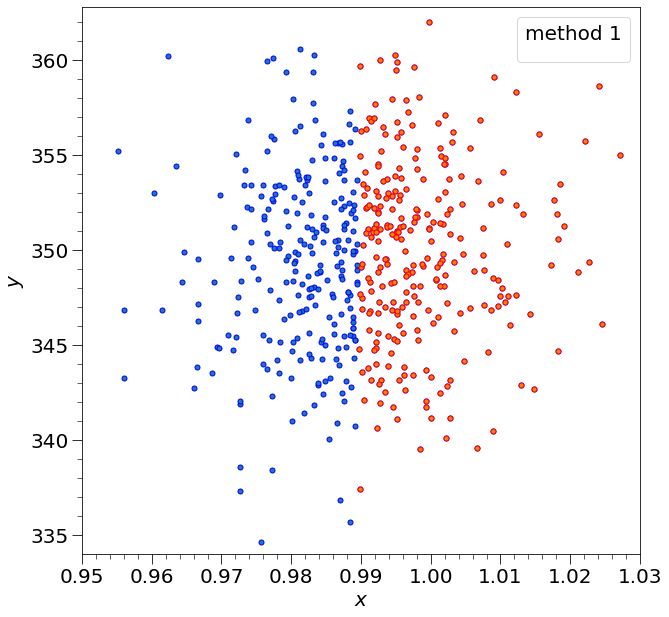

In [34]:
plot_scatter(x,y_method2,squeeze_x,squeeze_y)

No handles with labels found to put in legend.


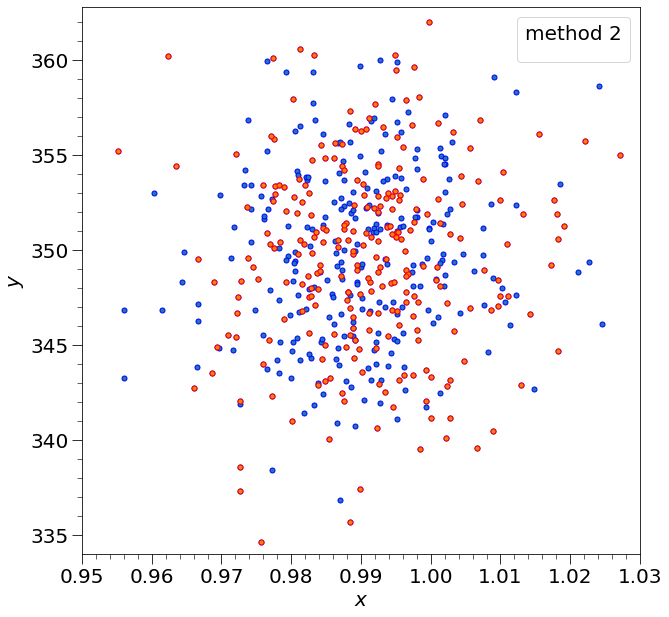

In [35]:
layer_0_mask = get_mask("pruned2_checkpoints/self-pruned-base-CIFAR10-100epochs-256bs-each-test-each-0.5.pth",0)

squeeze_x = squeeze_channel(x,layer_0_mask)
squeeze_y = squeeze_channel(y_method2,layer_0_mask)

plot_scatter(x,y_method2,squeeze_x,squeeze_y,"method 2")

No handles with labels found to put in legend.


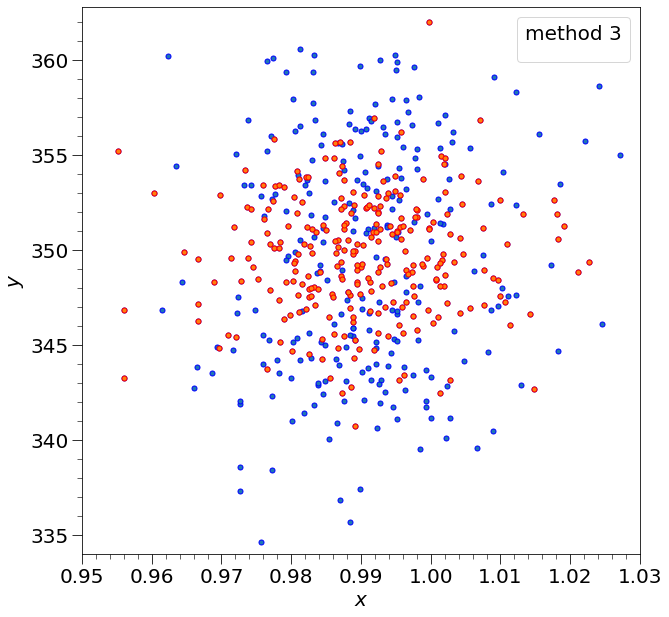

In [36]:
layer_0_mask = get_mask("pruned3_checkpoints/self-pruned-base-CIFAR10-100epochs-256bs-each-test-last-0.5.pth",0)

squeeze_x = squeeze_channel(x,layer_0_mask)
squeeze_y = squeeze_channel(y_method2,layer_0_mask)

plot_scatter(x,y_method2,squeeze_x,squeeze_y,"method 3")